<a href="https://colab.research.google.com/github/nchebet09/Naomi-s-Week-8-IP/blob/master/Naomi's_Week_8_IP%2C_Moringa_School_August_6th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Documentation

### a.) Specifying the question

Do the patient's previous symptoms indicate that the patient has hypothyroid?

### b.) Metrics for success

Successfully creating a model that can predict if the patient's previous symptoms indicate that the patient has hypothyroid. To achieve this, we will test our data on different models focusing on decision trees and support vector machines and use accuracy scores to determine the best model.

### c.) Understanding the business context

As a data scientist you are given health data from Nairobi hospital about hypothyroidism. Hypothyroidism is a condition in which thyroid gland does not produce enough of certain crucial hormones. These hormones include: triiodothyronine (T3) and thyroxine (T4). The hormones have a big impact on health which affects the aspects of metabolism and the control of vital functions such as body temperature and heart rate. 

Your responsibility is to create a model that would predict whether or not the patient's symptoms indicate if that patient has hypothyroid based on the given dataset.

The dataset given contains 3,163 records and 26 columns. The columns are shown below:

#### **Dataset columns**

1. status — hypothyroid positive or negative
2. age — age of patient
3. sex — gender of patient
4. on_thyroxine — is the patient using thyroxine or not
5. query_on_thyroxine — 
6. on_antithyroid_medication
7. thyroid_surgery — have had thyroid surgery or not
8. query_hypothyroid
9. query_hyperthyroid — a condition of producing too much thyroid hormone
10. pregnant — some women could develop hypthyroidism during or after prograncy
11. sick
12. tumor
13. lithium — medication used to treat certain psychiatric disorders can contribute to hypothyroidism
14. goitre — does the patient have goitre or not?
15. TSH_measured
16. TSH — thyroid Stimulating Hormone (test for hypothyroidism, you measure the level of TSH) failure of pituitary gland to produce enough TSH could lead to Hypothyroidism
17. T3_measured — measure of T3 (yes or no)
18. T3 — triiodothyronine (hormone produced by thyroid gland)
19. TT4_measured
20. TT4 — total thyroxine
21. T4U_measured
22. T4U
23. FTI_measured
24. FTI — free thyroxine index
25. TBG_measured
26. TBG

### d.) Experimental design

The approach for this project will include:

1. Reading material online to better understand on hypothyroidism

2. Reading and Initial Data Exploration

3. Data cleaning

4. EDA

5. Impelementing the solution with decision trees and support vector machines

6. Challenging the solution

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Reading and Initial Data Exploration

In [2]:
# loading data and previewing the first 5 rows

thyroid_df = pd.read_csv('hypothyroid.csv')
thyroid_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [3]:
# previewing the tail

thyroid_df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [4]:
# checking for the shape

thyroid_df.shape

# our dataset has 3,163 records and 26 columns

(3163, 26)

In [5]:
# previewing column names

thyroid_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [6]:
# checking for data types

thyroid_df.dtypes

# all the columns datatypes are listed as object,
# during cleaning we will need to change the columns whose data types have been listed incorrectly

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [7]:
# checking for unique values in each column

thyroid_df.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [8]:
# checking for unique values in categorical columns

thyroid_df['status'].unique()
# this is our target variable. it has two categories: hypothyroid and negative

array(['hypothyroid', 'negative'], dtype=object)

In [9]:
thyroid_df['sex'].unique()

# there is a question mark on sex column that we will need to take care of during cleaning

array(['M', 'F', '?'], dtype=object)

In [10]:
thyroid_df['on_thyroxine'].unique()

array(['f', 't'], dtype=object)

In [11]:
thyroid_df['query_on_thyroxine'].unique()

array(['f', 't'], dtype=object)

In [12]:
thyroid_df['on_antithyroid_medication'].unique()

array(['f', 't'], dtype=object)

In [13]:
thyroid_df['thyroid_surgery'].unique()

array(['f', 't'], dtype=object)

In [14]:
thyroid_df['query_hypothyroid'].unique()

array(['f', 't'], dtype=object)

In [15]:
thyroid_df['query_hyperthyroid'].unique()

array(['f', 't'], dtype=object)

In [16]:
thyroid_df['pregnant'].unique()

array(['f', 't'], dtype=object)

In [17]:
thyroid_df['sick'].unique()

array(['f', 't'], dtype=object)

In [18]:
thyroid_df['tumor'].unique()

array(['f', 't'], dtype=object)

In [19]:
thyroid_df['lithium'].unique()

array(['f', 't'], dtype=object)

In [20]:
thyroid_df['goitre'].unique()

array(['f', 't'], dtype=object)

In [21]:
thyroid_df['TSH_measured'].unique()

array(['y', 'n'], dtype=object)

In [22]:
thyroid_df['T3_measured'].unique()

array(['y', 'n'], dtype=object)

In [23]:
thyroid_df['TT4_measured'].unique()

array(['y', 'n'], dtype=object)

In [24]:
thyroid_df['T4U_measured'].unique()

array(['y', 'n'], dtype=object)

In [25]:
thyroid_df['FTI_measured'].unique()

array(['y', 'n'], dtype=object)

In [26]:
thyroid_df['TBG_measured'].unique()

array(['n', 'y'], dtype=object)

In [27]:
# checking for unique values in numerical columns

thyroid_df['age'].unique()

# we see values as integers except for the question mark which will be taken care of during cleaning

array(['72', '15', '24', '77', '85', '64', '20', '42', '69', '75', '53',
       '59', '68', '50', '78', '65', '28', '43', '40', '84', '?', '83',
       '63', '73', '36', '27', '48', '71', '60', '34', '79', '62', '74',
       '32', '41', '70', '29', '5', '58', '35', '51', '22', '16', '44',
       '39', '47', '18', '17', '88', '56', '30', '45', '66', '52', '54',
       '80', '33', '38', '92', '67', '46', '13', '89', '61', '49', '26',
       '57', '31', '90', '81', '25', '37', '76', '87', '23', '55', '86',
       '98', '21', '97', '1', '6', '14', '82', '11', '19', '9', '12',
       '10', '8', '7', '4', '93'], dtype=object)

In [28]:
thyroid_df['T3'].unique()

# all the records are floats except for the question. it will be handled during cleaning

array(['0.60', '1.70', '0.20', '0.40', '1.20', '1.10', '1.30', '1.90',
       '?', '0.80', '2.20', '1.50', '2.70', '2', '0.30', '2.10', '0.50',
       '0.70', '1', '1.40', '2.30', '2.40', '0.90', '1.80', '0', '2.80',
       '1.60', '6.70', '3.30', '3', '2.50', '2.60', '4', '9.80', '3.90',
       '3.40', '3.80', '4.50', '3.20', '3.70', '4.30', '2.90', '3.10',
       '3.50', '3.60', '6.60', '4.90', '8.90', '4.10', '5', '5.30',
       '7.60', '7.30', '4.20', '4.40', '5.10', '7', '0.10', '0.05',
       '4.70', '6.20', '5.50', '4.60', '6.10', '8.10', '5.20', '5.60',
       '4.80', '10.20', '8.60'], dtype=object)

In [29]:
thyroid_df['TT4'].unique()

# all the values are integers except for question mark which will be handled during cleaning

array(['15', '19', '4', '6', '57', '27', '54', '34', '39', '7.60', '53',
       '38', '98', '44', '37', '81', '13', '17', '12', '50', '23', '14',
       '3.90', '52', '32', '30', '84', '10', '55', '24', '28', '11',
       '6.60', '31', '33', '41', '9', '78', '42', '8.10', '65', '16',
       '9.70', '46', '22', '61', '2.30', '21', '7.50', '18', '66', '25',
       '43', '2', '3', '58', '59', '71', '74', '56', '40', '20', '48',
       '230', '70', '4.10', '63', '5.30', '2.90', '62', '75', '68', '45',
       '47', '36', '80', '109', '8.60', '83', '82', '101', '76', '103',
       '112', '206', '110', '93', '79', '121', '?', '107', '88', '187',
       '254', '115', '113', '260', '117', '164', '97', '64', '129', '111',
       '106', '95', '87', '105', '90', '67', '134', '35', '193', '143',
       '130', '108', '86', '96', '92', '99', '216', '152', '125', '138',
       '194', '91', '120', '102', '170', '126', '116', '140', '94', '159',
       '85', '210', '89', '151', '247', '139', '153', '178

In [30]:
thyroid_df['T4U'].unique()

# we see majority of the values are floats,
# but we also have a few integers and the presence of the question mark which will be handled during cleaning

array(['1.48', '1.13', '1', '1.04', '1.28', '1.19', '0.86', '1.05',
       '1.21', '1.02', '0.92', '1.29', '0.98', '1.08', '1.01', '1.18',
       '1.10', '1.27', '0.83', '1.11', '0.78', '1.39', '1.12', '0.93',
       '0.99', '0.90', '1.06', '0.68', '0.67', '1.14', '0.80', '0.96',
       '0.95', '1.46', '1.03', '0.97', '0.94', '1.09', '1.24', '1.23',
       '1.53', '1.26', '1.40', '1.17', '0.87', '0.61', '0.70', '1.07',
       '1.73', '1.45', '1.20', '0.89', '0.84', '0.91', '0.85', '1.35',
       '0.82', '1.50', '0.74', '1.71', '1.79', '0.73', '0.77', '1.25',
       '?', '0.88', '0.72', '0.31', '0', '0.79', '0.81', '0.71', '1.93',
       '1.32', '0.66', '1.68', '1.42', '1.70', '1.83', '1.41', '1.34',
       '1.65', '1.22', '0.75', '1.74', '0.69', '1.51', '0.76', '1.16',
       '0.35', '0.62', '0.54', '1.36', '1.33', '1.30', '0.48', '1.59',
       '1.75', '1.86', '1.38', '1.43', '1.62', '2.01', '0.30', '1.31',
       '1.15', '1.57', '0.55', '1.66', '0.52', '1.97', '1.47', '0.36',
       

In [31]:
thyroid_df['FTI'].unique()

# there is a combination of floats and integers. we will convert the integers to float during cleaning.
# we also have question mark as a unique value, we will handle this during cleaning.

array(['10', '17', '0', '6', '44', '23', '63', '32', '7.50', '61', '41',
       '76', '45', '34', '81', '11', '16', '46', '22', '12', '5', '47',
       '29', '37', '60', '8.40', '8.50', '24', '28', '7', '49', '36',
       '15', '9', '80', '53', '7.20', '68', '6.60', '48', '21', '14', '2',
       '20', '1.40', '56', '3', '51', '13', '43', '78', '52', '64', '26',
       '35', '31', '133', '3.40', '54', '8.90', '57', '5.50', '58', '55',
       '2.80', '66', '4', '40', '50', '8.70', '87', '89', '112', '123',
       '99', '92', '104', '69', '196', '107', '106', '74', '97', '?',
       '122', '84', '114', '124', '241', '119', '120', '136', '85', '127',
       '839', '137', '197', '96', '77', '108', '82', '72', '94', '91',
       '240', '121', '109', '79', '100', '98', '73', '117', '165', '103',
       '88', '101', '126', '132', '128', '143', '152', '141', '186',
       '113', '102', '125', '93', '105', '159', '188', '71', '149', '116',
       '83', '176', '161', '86', '140', '111', '158', '1

In [32]:
thyroid_df['TBG'].unique()

# TBG consists of a question mark (to be handled during cleaning) and the rest are integers

array(['?', '28', '34', '0', '19', '30', '25', '48', '39', '31', '16',
       '21', '37', '40', '27', '3.10', '38', '108', '20', '36', '17',
       '23', '35', '32', '63', '9.30', '15', '26', '33', '41', '110',
       '22', '43', '53', '80', '47', '29', '13', '24', '18', '45', '86',
       '50', '8.40', '52', '11', '12', '14', '65', '7.30', '8.50', '69',
       '122'], dtype=object)

After checking the unique values in all the columns, let's check what is the total number of records that have question marks in all the columns. See the code below.

In [33]:
print(thyroid_df[thyroid_df == '?'].count())

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64


Here are the records that have question marks with the total number of question marks in each column.

age = 446

sex = 73

TSH = 468

T3 = 695

TT4 = 249

T4U = 248

FTI = 247

TBG = 2,903

Based on these observations, we quickly notice that TBG has the most question marks. It's total number of records with question marks is more than 75% of the total records. We will delete this column given that the records with question marks is too many and it doesn't make sense to impute more than 75% of the records.

As for the other records with question marks, we will find a way to deal with the question marks by either imputing them or deleting them if it doesn't make sense to impute.




In [34]:
# I am interested to see the total number of records for each category (negative and hypothyroid) in 
# status column. 

thyroid_df[thyroid_df['status']=='negative'].shape

# we see that the records that have status equal to negative is 3,012

(3012, 26)

In [35]:
thyroid_df[thyroid_df['status']=='hypothyroid'].shape
# records that have hypothyroid on status column equals to 151

(151, 26)

## Data cleaning  

In [36]:
# checking for completeness. Are there any missing values in our dataset?

print(thyroid_df.isnull().sum())

# there are no missing values in our dataset

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64


In [37]:
# checking for duplicates (consitency)

thyroid_df.duplicated().value_counts()
# we see 77 listed records as duplicates, let's explore further in the next cell

False    3086
True       77
dtype: int64

In [38]:
# exploring further on the duplicated records
duplicated = thyroid_df[thyroid_df.duplicated()]
duplicated

# given that we dont have a unique ID, it's hard to tell if these columns are actually duplicated. 
# All the records shown below are different, hence we wont be deleting any of these records.

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
53,hypothyroid,69,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,0.80,y,53,y,0.86,y,61,n,?
66,hypothyroid,62,M,f,f,f,f,f,f,f,f,f,f,f,y,100,y,0.40,y,10,y,1,y,10,n,?
124,hypothyroid,77,F,f,f,f,f,f,f,f,f,f,f,f,y,23,y,0.50,y,33,y,0.67,y,49,n,?
128,hypothyroid,79,F,f,f,f,f,f,f,f,f,f,f,f,y,29,y,1.60,y,47,y,0.97,y,48,n,?
131,hypothyroid,50,F,t,f,f,f,f,f,f,f,f,f,f,y,34,n,?,y,55,y,0.93,y,60,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,negative,28,M,f,f,f,f,f,f,f,f,f,f,f,y,1,y,3.10,y,107,y,1.05,y,103,n,?
3055,negative,33,F,f,f,f,f,f,f,f,f,f,f,f,n,?,y,0.80,y,88,y,1.02,y,86,n,?
3066,negative,74,F,t,f,f,f,f,f,f,f,f,f,f,y,21,y,1.80,y,126,y,1.18,y,107,n,?
3111,negative,89,M,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.90,y,82,y,0.80,y,103,n,?


In [39]:
# Next we drop TBG column, this is the column with more than 75% records as question marks

thyroid_df.drop('TBG', axis=1, inplace=True)

In [40]:
# confirming that TBG has been dropped
thyroid_df.columns

# TBG has been dropped

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

In [41]:
thyroid_df.shape

(3163, 25)

In [42]:
# during the data initial exploration we saw that all the columns were listed as objects, but they are not all objects.
# in this section we will convert the columns to their appropriate datatypes.
# let's start by converting categorical variables to category

thyroid_df['status'] = thyroid_df['status'].astype('category')
thyroid_df['sex'] = thyroid_df['sex'].astype('category')
thyroid_df['on_thyroxine'] = thyroid_df['on_thyroxine'].astype('category')
thyroid_df['query_on_thyroxine'] = thyroid_df['query_on_thyroxine'].astype('category')
thyroid_df['on_antithyroid_medication'] = thyroid_df['on_antithyroid_medication'].astype('category')
thyroid_df['thyroid_surgery'] = thyroid_df['thyroid_surgery'].astype('category')
thyroid_df['query_hypothyroid'] = thyroid_df['query_hypothyroid'].astype('category')

thyroid_df['query_hyperthyroid'] = thyroid_df['query_hyperthyroid'].astype('category')
thyroid_df['pregnant'] = thyroid_df['pregnant'].astype('category')
thyroid_df['sick'] = thyroid_df['sick'].astype('category')
thyroid_df['tumor'] = thyroid_df['tumor'].astype('category')
thyroid_df['lithium'] = thyroid_df['lithium'].astype('category')
thyroid_df['goitre'] = thyroid_df['goitre'].astype('category')
thyroid_df['TSH_measured'] = thyroid_df['TSH_measured'].astype('category')

thyroid_df['T3_measured'] = thyroid_df['T3_measured'].astype('category')
thyroid_df['TT4_measured'] = thyroid_df['TT4_measured'].astype('category')
thyroid_df['T4U_measured'] = thyroid_df['T4U_measured'].astype('category')
thyroid_df['FTI_measured'] = thyroid_df['FTI_measured'].astype('category')
thyroid_df['TBG_measured'] = thyroid_df['TBG_measured'].astype('category')


In [43]:
# confirming that the categorical variables have been converted to category datatypes

thyroid_df.dtypes

# yes they have

status                       category
age                            object
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                            object
T3_measured                  category
T3                             object
TT4_measured                 category
TT4                            object
T4U_measured                 category
T4U                            object
FTI_measured                 category
FTI                            object
TBG_measured                 category
dtype: object

In [44]:
# let's convert numerical variables to numerical datatypes and replace question marks nan
thyroid_df['age'] = pd.to_numeric(thyroid_df['age'], errors = 'coerce') #‘coerce’ converts invalid parsing in this case '?' to NaN.
thyroid_df['TSH'] = pd.to_numeric(thyroid_df['TSH'], errors = 'coerce')
thyroid_df['T3'] = pd.to_numeric(thyroid_df['T3'], errors = 'coerce')
thyroid_df['TT4'] = pd.to_numeric(thyroid_df['TT4'], errors = 'coerce')
thyroid_df['T4U'] = pd.to_numeric(thyroid_df['T4U'], errors = 'coerce')
thyroid_df['FTI'] = pd.to_numeric(thyroid_df['FTI'], errors = 'coerce')

print(thyroid_df.dtypes)
# we see that all the columns have been converted to float, but some of the columns are not floats. 
# We will change the non-float columns to appropriate datatypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
dtype: object


In [45]:
# checking for null values
print(thyroid_df.isnull().sum())

status                         0
age                          446
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          468
T3_measured                    0
T3                           695
TT4_measured                   0
TT4                          249
T4U_measured                   0
T4U                          248
FTI_measured                   0
FTI                          247
TBG_measured                   0
dtype: int64


In [46]:
# dropping the null values

thyroid_df.dropna(inplace=True)

In [47]:
# confirming that the missing values have been dropped

print(thyroid_df.isnull().sum())

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64


In [48]:
# earlier we had seen that age, and TT4 were listed as floats but they are integers. we will fix that here

thyroid_df['age'] = thyroid_df['age'].astype(int)
thyroid_df['TT4'] = thyroid_df['TT4'].astype(int)

In [49]:
# checking if all the columns have the correct data types

thyroid_df.dtypes

status                       category
age                             int64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                             int64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
dtype: object

In [50]:
#  let's check if we still have any columns with question marks

print(thyroid_df[thyroid_df == '?'].count())

# all the columns have no question marks except for the sex column. we will take care of that next

status                        0
age                           0
sex                          12
on_thyroxine                  0
query_on_thyroxine            0
on_antithyroid_medication     0
thyroid_surgery               0
query_hypothyroid             0
query_hyperthyroid            0
pregnant                      0
sick                          0
tumor                         0
lithium                       0
goitre                        0
TSH_measured                  0
TSH                           0
T3_measured                   0
T3                            0
TT4_measured                  0
TT4                           0
T4U_measured                  0
T4U                           0
FTI_measured                  0
FTI                           0
TBG_measured                  0
dtype: int64


In [51]:
# the sex column has only 12 records with '?', we will drop these records to avoid any errors during the analysis

df = thyroid_df.loc[thyroid_df['sex']=='?']
print(df)
thyroid_df = thyroid_df.drop([402, 721, 984, 1337, 1675, 1739, 1863, 2077, 2080, 2107, 2595, 2895], axis ='index')

        status  age sex on_thyroxine  ...   T4U FTI_measured    FTI TBG_measured
402   negative   42   ?            t  ...  1.02            y  126.0            n
721   negative   46   ?            t  ...  0.91            y  162.0            n
984   negative   37   ?            f  ...  1.05            y  134.0            n
1337  negative   38   ?            f  ...  0.83            y  104.0            n
1675  negative   27   ?            f  ...  0.95            y   99.0            n
1739  negative   64   ?            f  ...  0.85            y  110.0            n
1863  negative   38   ?            f  ...  0.70            y  117.0            n
2077  negative   47   ?            f  ...  1.31            y   78.0            n
2080  negative   55   ?            f  ...  0.89            y   92.0            n
2107  negative   65   ?            f  ...  0.77            y  168.0            n
2595  negative   18   ?            t  ...  1.12            y  107.0            n
2895  negative   46   ?     

In [52]:
# confirming that the rows in the sex columns with question marks have been dropped
print(thyroid_df[thyroid_df == '?'].count())

# checking the current shape of our data frame
print(thyroid_df.shape)
# our data set has 2,000 records and 25 columns 

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64
(2000, 25)


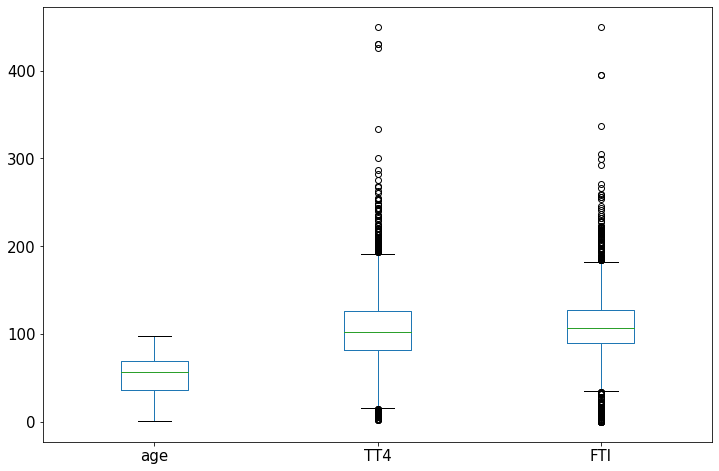

In [53]:
# checking for outliers in numerical variables
# plotting boxplots for age, TT4 and FTI
thyroid_df.boxplot(['age', 'TT4', 'FTI'], grid=False, figsize=(12,8), fontsize=15)

Age has no outliers. TT4 and FTI have some outliers but based in research we establish that it is possible to have very high or low levels of TT4 and FTI so we wont be deleting these outliers

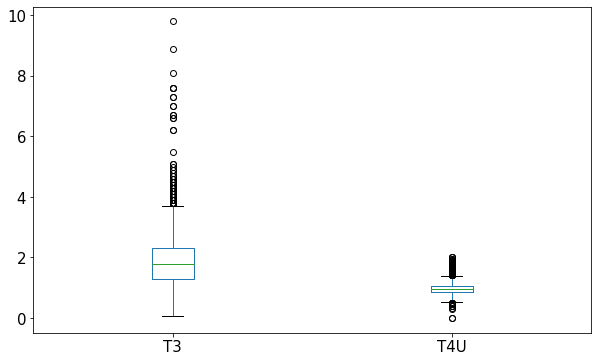

In [55]:
# plotting boxplots for T3 and T4U
thyroid_df.boxplot(['T3', 'T4U'], grid=False, figsize=(10,6), fontsize=15)

We see some outliers on both columns, but we will keep them as well

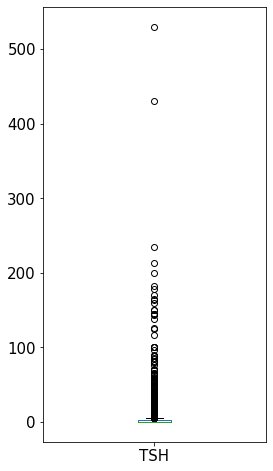

In [58]:
# plotting boxplots for TSH
thyroid_df.boxplot(['TSH'], grid=False, figsize=(4,8), fontsize=15)

There are outliers, and we have two points that are clearly away from the rest. These two points might affect our data so we will get rid of them